# BITS F312 - Neural Network and Fuzzy Logic



## Assignment 1

In [ ]:
# importing libraries required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# connecting gdrive to access the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# finding out current working directory
!pwd

/content


In [ ]:
# changing directory to - 'drive/MyDrive/NNFL/Data_A1/'
%cd drive/MyDrive/NNFL/Data_A1/

/content/drive/MyDrive/NNFL/Data_A1


In [ ]:
# defining plotting style
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (14, 14)

### Q2
Implement linear regression with the L2-norm regularization (Ridge regression)
approach using BGD, SGD, and MBGD algorithms. The ridge regression model
weight parameters must be evaluated from the training data. After evaluating the
weight parameters, evaluate the predicted output for the parameters, evaluate the predicted output for the test feature vectors. For Q2, the data_q2_q3.xlsx file must be used. Evaluate the mean square error (MSE), mean absolute error (MAE), and correlation coefficient (CC) by comparing the actual test output and predicted test output for ridge regression models with BGD, SGD, and MBGD algorithms. You can use grid search to evaluate the optimal parameters of the model. You can divide the dataset into training, validation, and testing using hold-out cross-validation (70% (training), 10% (validation), and 20% (testing)).

### L2-norm regularization (Ridge regression) approach using BGD

In [ ]:
# value predicted from current weights
def pred_BGD_L2(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_BGD_L2(y, x, w):
  pred_val = pred_BGD_L2(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_BGD_L2(x, y, w, alpha = 0.001, lambd = 0.005):
  w = w - alpha*(np.sum((pred_BGD_L2(x,w)-y).dot(x)))/(x.shape[0]) - (alpha*lambd)*w
  return w

In [ ]:
def MSE(X, Y, W):
  return (np.square((pred_BGD_L2(X, W) - Y))).mean() 

In [ ]:
def MAE(X, Y, W):
  return (np.abs((pred_BGD_L2(X, W) - Y))).mean()

In [ ]:
def CC(X, Y, W):
  Y_pred = pred_BGD_L2(X, W)
  num = np.mean((Y_pred - np.mean(Y_pred))*(Y - np.mean(Y)))
  den = np.sqrt((np.mean(np.square(Y_pred-np.mean(Y_pred))))*(np.mean(np.square(Y-np.mean(Y)))))
  return num/den

In [ ]:
# Batch Gradient Function
def BGD_L2(filename):
  datasetQ2 = pd.read_excel(filename) # dataset for Q2
  # shuffling the data for performing hold-out cross-validation
  df = datasetQ2.sample(frac=1).reset_index(drop=True)
  df_training = df[:70]
  df_validation = df[70:80]
  df_testing = df[80:]

  X_train = (np.array([np.ones(len(df_training)),df_training['Feat1'], df_training['Feat2'], df_training['Feat3'], df_training['Feat4']])).T # Extracting the X vector from the dataset 
  Y_train = (np.array(df_training['Output'])).T # Extracting the Y vector

  X_validation = (np.array([np.ones(len(df_validation)),df_validation['Feat1'], df_validation['Feat2'], df_validation['Feat3'], df_validation['Feat4']])).T # Extracting the X vector from the dataset 
  Y_validation = (np.array(df_validation['Output'])).T # Extracting the Y vector

  X_testing = (np.array([np.ones(len(df_testing)),df_testing['Feat1'], df_testing['Feat2'], df_testing['Feat3'], df_testing['Feat4']])).T # Extracting the X vector from the dataset 
  Y_testing = (np.array(df_testing['Output'])).T # Extracting the Y vector

  
  
  # randomizing intial values of the weights
  W = (np.random.randn((X_train.shape)[1])).T

  ALPHA = 0.001 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch

  EPOCH = 500
  for iteration in range(EPOCH):
    costs.append(cost_BGD_L2(Y_train,X_train,W))
    W = update_BGD_L2(X_train,Y_train,W)
  
  print("Evaluation for Training Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_train,Y_train,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_train,Y_train,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_train,Y_train,W)))

  print("Evaluation for Testing Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_testing,Y_testing,W)))

  print("Evaluation for Validation Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_validation,Y_validation,W)))

  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_BGD_L2(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Batch Gradient Descent)')

### Output


In [ ]:
costs_BGD_L2, W_BGD_L2  = BGD_L2('data_q2_q3.xlsx')

Evaluation for Training Data
----------------------------
Mean Sqaured Error (MSE): 0.20192138635585238
Mean Absolute Error (MAE): 0.20192138635585238
Correlation Coefficent (CC): 0.5611894427313313
Evaluation for Testing Data
----------------------------
Mean Sqaured Error (MSE): 0.18557482347591567
Mean Absolute Error (MAE): 0.18557482347591567
Correlation Coefficent (CC): 0.5675215613739688
Evaluation for Validation Data
----------------------------
Mean Sqaured Error (MSE): 0.1529151458704375
Mean Absolute Error (MAE): 0.1529151458704375
Correlation Coefficent (CC): 0.5456414000112311


In [ ]:
for val in range(len(W_BGD_L2)):
  print('W{0}: {1}'.format(val, W_BGD_L2[val]))

W0: -0.6947351093996791
W1: 1.8331885361206992
W2: 0.21391529633810125
W3: 0.013189872226809932
W4: 0.46767778615396394


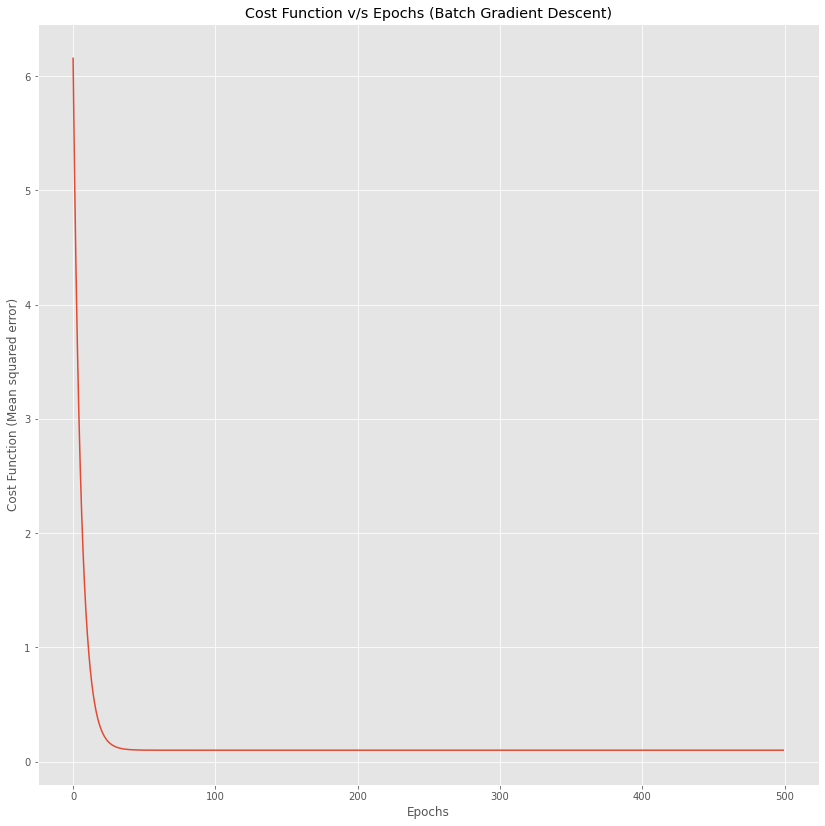

In [ ]:
plot_costs_BGD_L2(costs_BGD_L2)

### L2-norm regularization (Ridge regression) approach using SGD

In [ ]:
# value predicted from current weights
def pred_SGD_L2(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_SGD_L2(y, x, w):
  pred_val = pred_SGD_L2(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_SGD_L2(x, y, w, alpha = 0.001, lambd = 0.05):

  idx = np.random.randint(0,x.shape[0])
  w = w - alpha*(np.sum((pred_SGD_L2(x[idx],w)-y[idx])*(x[idx])))/(x.shape[0]) - (alpha*lambd)*w
  return w


In [ ]:
def MSE(X, Y, W):
  return (np.square((pred_SGD_L2(X, W) - Y))).mean() 

In [ ]:
def MAE(X, Y, W):
  return (np.abs((pred_SGD_L2(X, W) - Y))).mean()

In [ ]:
def CC(X, Y, W):
  Y_pred = pred_SGD_L2(X, W)
  num = np.mean((Y_pred - np.mean(Y_pred))*(Y - np.mean(Y)))
  den = np.sqrt((np.mean(np.square(Y_pred-np.mean(Y_pred))))*(np.mean(np.square(Y-np.mean(Y)))))
  return num/den

In [ ]:
# Batch Gradient Function
def SGD_L2(filename):
  datasetQ2 = pd.read_excel(filename) # dataset for Q2
  # shuffling the data for performing hold-out cross-validation
  df = datasetQ2.sample(frac=1).reset_index(drop=True)
  df_training = df[:70]
  df_validation = df[70:80]
  df_testing = df[80:]

  X_train = (np.array([np.ones(len(df_training)),df_training['Feat1'], df_training['Feat2'], df_training['Feat3'], df_training['Feat4']])).T # Extracting the X vector from the dataset 
  Y_train = (np.array(df_training['Output'])).T # Extracting the Y vector

  X_validation = (np.array([np.ones(len(df_validation)),df_validation['Feat1'], df_validation['Feat2'], df_validation['Feat3'], df_validation['Feat4']])).T # Extracting the X vector from the dataset 
  Y_validation = (np.array(df_validation['Output'])).T # Extracting the Y vector

  X_testing = (np.array([np.ones(len(df_testing)),df_testing['Feat1'], df_testing['Feat2'], df_testing['Feat3'], df_testing['Feat4']])).T # Extracting the X vector from the dataset 
  Y_testing = (np.array(df_testing['Output'])).T # Extracting the Y vector

  
  
  # randomizing intial values of the weights
  W = (np.random.randn((X_train.shape)[1])).T

  ALPHA = 0.01 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch

  EPOCH = 5000
  for iteration in range(EPOCH):
    costs.append(cost_SGD_L2(Y_train,X_train,W))
    W = update_SGD_L2(X_train,Y_train,W)
  
  print("Evaluation for Training Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_train,Y_train,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_train,Y_train,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_train,Y_train,W)))

  print("Evaluation for Testing Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_testing,Y_testing,W)))

  print("Evaluation for Validation Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_validation,Y_validation,W)))

  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_SGD_L2(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Stochastic Gradient Descent)')

### Output


In [ ]:
costs_SGD_L2, W_SGD_L2  = SGD_L2('data_q2_q3.xlsx')

Evaluation for Training Data
----------------------------
Mean Sqaured Error (MSE): 0.47738544318651505
Mean Absolute Error (MAE): 0.47738544318651505
Correlation Coefficent (CC): 0.18965118980453544
Evaluation for Testing Data
----------------------------
Mean Sqaured Error (MSE): 0.3814963339365266
Mean Absolute Error (MAE): 0.3814963339365266
Correlation Coefficent (CC): 0.11253849363121268
Evaluation for Validation Data
----------------------------
Mean Sqaured Error (MSE): 0.41319765928442154
Mean Absolute Error (MAE): 0.41319765928442154
Correlation Coefficent (CC): 0.25343645908091234


In [ ]:
for val in range(len(W- (alpha*lambd)*w_SGD_L2)):
  print('W{0}: {1}'.format(val, W_SGD_L2[val]))

W0: -1.0636894942756627
W1: -0.8052642321817086
W2: 0.5575902224059459
W3: -0.19309490380388447
W4: 0.7553184314708906


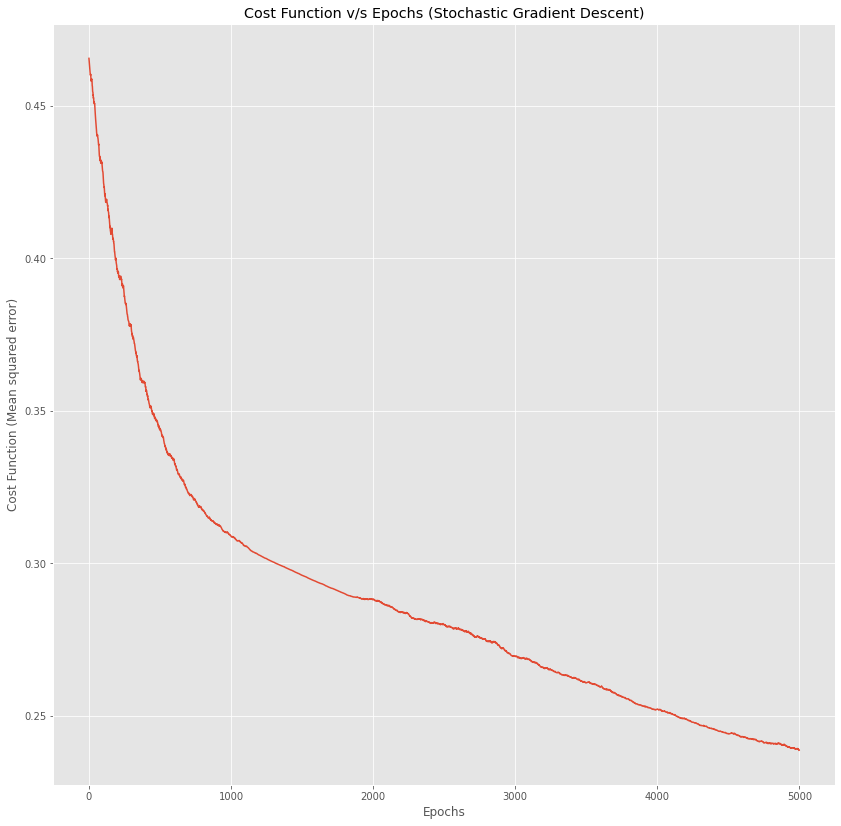

In [ ]:
plot_costs_SGD_L2(costs_SGD_L2)

### L2-norm regularization (Ridge regression) approach using MBGD

In [ ]:
# value predicted from current weights
def pred_MBGD_L2(x, w):
  return (np.dot(x,w))

In [ ]:
# cost/loss function
def cost_MBGD_L2(y, x, w):
  pred_val = pred_MBGD_L2(x,w)
  val = np.sum((pred_val-y)**2)
  return val/(2*(x.shape[0]))

In [ ]:
# weight updation 
def update_MBGD_L2(x, y, w, alpha = 0.001, lambd = 0.05, batch_size = 8):

  idx = np.random.randint(0,x.shape[0], size=batch_size)
  w = w - alpha*(np.sum((pred_MBGD_L2(x[idx],w)-y[idx]).dot(x[idx])))/(x.shape[0]) 

  return w


In [ ]:
def MSE(X, Y, W):
  return (np.square((pred_MBGD_L2(X, W) - Y))).mean() 

In [ ]:
def MAE(X, Y, W):
  return (np.abs((pred_MBGD_L2(X, W) - Y))).mean()

In [ ]:
def CC(X, Y, W):
  Y_pred = pred_MBGD_L2(X, W)
  num = np.mean((Y_pred - np.mean(Y_pred))*(Y - np.mean(Y)))
  den = np.sqrt((np.mean(np.square(Y_pred-np.mean(Y_pred))))*(np.mean(np.square(Y-np.mean(Y)))))
  return num/den

In [ ]:
# Batch Gradient Function
def MBGD_L2(filename):
  datasetQ2 = pd.read_excel(filename) # dataset for Q2
  # shuffling the data for performing hold-out cross-validation
  df = datasetQ2.sample(frac=1).reset_index(drop=True)
  df_training = df[:70]
  df_validation = df[70:80]
  df_testing = df[80:]

  X_train = (np.array([np.ones(len(df_training)),df_training['Feat1'], df_training['Feat2'], df_training['Feat3'], df_training['Feat4']])).T # Extracting the X vector from the dataset 
  Y_train = (np.array(df_training['Output'])).T # Extracting the Y vector

  X_validation = (np.array([np.ones(len(df_validation)),df_validation['Feat1'], df_validation['Feat2'], df_validation['Feat3'], df_validation['Feat4']])).T # Extracting the X vector from the dataset 
  Y_validation = (np.array(df_validation['Output'])).T # Extracting the Y vector

  X_testing = (np.array([np.ones(len(df_testing)),df_testing['Feat1'], df_testing['Feat2'], df_testing['Feat3'], df_testing['Feat4']])).T # Extracting the X vector from the dataset 
  Y_testing = (np.array(df_testing['Output'])).T # Extracting the Y vector

  
  
  # randomizing intial values of the weights
  W = (np.random.randn((X_train.shape)[1])).T

  ALPHA = 0.01 # declaring the learning rate 

  costs = [] # to save the cost value for each epoch

  EPOCH = 5000
  for iteration in range(EPOCH):
    costs.append(cost_MBGD_L2(Y_train,X_train,W))
    W = update_MBGD_L2(X_train,Y_train,W)
  
  print("Evaluation for Training Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_train,Y_train,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_train,Y_train,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_train,Y_train,W)))
  print("----------------------------")

  print("Evaluation for Testing Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_testing,Y_testing,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_testing,Y_testing,W)))
  print("----------------------------")

  print("Evaluation for Validation Data")
  print("----------------------------")
  print("Mean Sqaured Error (MSE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Mean Absolute Error (MAE): {0}".format(MSE(X_validation,Y_validation,W)))
  print("Correlation Coefficent (CC): {0}".format(CC(X_validation,Y_validation,W)))
  print("----------------------------")
  
  # returns the log of values of the cost, and the weights for each iteration as well as the Weight Matrix
  return costs, W 

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_MBGD_L2(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function (Mean squared error)')
  plt.title('Cost Function v/s Epochs (Mini Batch Gradient Descent)')

### Output


In [ ]:
costs_MBGD_L2, W_MBGD_L2  = MBGD_L2('data_q2_q3.xlsx')

Evaluation for Training Data
----------------------------
Mean Sqaured Error (MSE): 0.2901098650594508
Mean Absolute Error (MAE): 0.2901098650594508
Correlation Coefficent (CC): 0.2792600733377913
----------------------------
Evaluation for Testing Data
----------------------------
Mean Sqaured Error (MSE): 0.384614582138772
Mean Absolute Error (MAE): 0.384614582138772
Correlation Coefficent (CC): 0.24300610717597484
----------------------------
Evaluation for Validation Data
----------------------------
Mean Sqaured Error (MSE): 0.28289154239874487
Mean Absolute Error (MAE): 0.28289154239874487
Correlation Coefficent (CC): 0.11379856761954715
----------------------------


In [ ]:
for val in range(len(W_MBGD_L2)):
  print('W{0}: {1}'.format(val, W_MBGD_L2[val]))

W0: -0.966042816354239
W1: -0.25109253214975913
W2: 0.2228338200251055
W3: -0.046881645710288807
W4: 0.6421310494216147


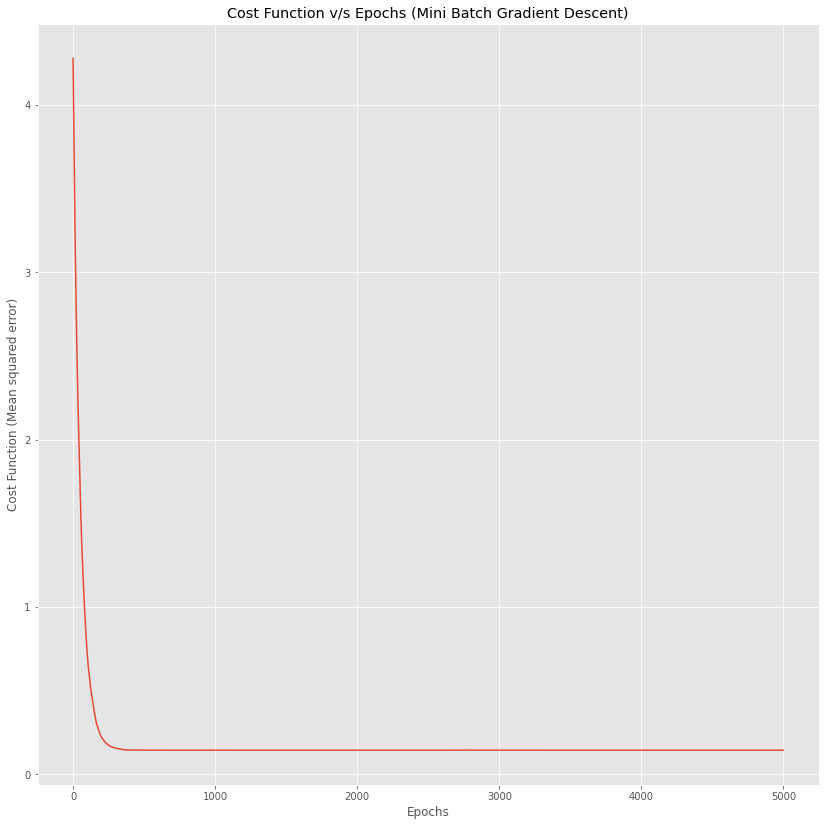

In [ ]:
plot_costs_MBGD_L2(costs_MBGD_L2)